# HBO EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer

In [2]:
folder_path = "/Users/hunterkempf/Documents/GitHub/Streaming_Wars/"
HBO_Content_DF_Path = 'Medium Data/HBO/HBO_Content.csv'
HBO_MAX_Content_DF_Path = 'Medium Data/HBO/HBO_MAX_Content.csv'

In [3]:
HBO_df = pd.read_csv(folder_path+HBO_Content_DF_Path)
HBO_MAX_df = pd.read_csv(folder_path+HBO_MAX_Content_DF_Path)

### Decade Buckets

In [4]:
buckets = [1910,1919,1929,1939,1949,1959,1969,1979,1989,1999,2009,2019,2029]
decadeLabels = ['1910-1919','1920-1929','1930-1939','1940-1949','1950-1959','1960-1969',
                '1970-1979','1980-1989','1990-1999','2000-2009','2010-2019','2020-2029']
HBO_MAX_df['decade'] = pd.cut(HBO_MAX_df['year'], bins=buckets,labels=decadeLabels)
HBO_df['decade'] = pd.cut(HBO_df['year'], bins=buckets,labels=decadeLabels)

### IMDB Score Buckets

In [5]:
buckets = [0,5,6,7,7.5,8,8.5,9,9.5,10]
scoreLabels = ['0-5.00','5.01-6.00','6.01-7.00','7.01-7.50','7.51-8.00','8.01-8.50',
                '8.51-9.00','9.01-9.50','9.51-10']
HBO_MAX_df['imdb_bucket'] = pd.cut(HBO_MAX_df['imdb_score'], bins=buckets,labels=scoreLabels)
HBO_df['imdb_bucket'] = pd.cut(HBO_df['imdb_score'], bins=buckets,labels=scoreLabels)

In [6]:
HBO_df.head()

,title,type,year,rating,imdb_score,rotten_score,decade,imdb_bucket,genres_Action_Adventure,genres_Animation,...,platforms_hbo_max,platforms_hoopla,platforms_hulu_plus,platforms_kanopy,platforms_netflix,platforms_shoutfactorytv,platforms_sundancenow,platforms_syfy_tveverywhere,platforms_tlc_go,platforms_viceland_tve
0,Game of Thrones,TV,2011,R/TV-MA,9.3,89.0,2010-2019,9.01-9.50,1,0,...,1,0,0,0,0,0,0,0,0,0
1,Fight Club,NaN,1999,R/TV-MA,8.8,79.0,1990-1999,8.51-9.00,0,0,...,1,0,0,0,0,0,0,0,0,0
2,Alien,NaN,1979,R/TV-MA,8.4,94.0,1970-1979,8.01-8.50,0,0,...,1,0,0,0,0,0,0,0,0,0
3,Chernobyl,TV,2019,R/TV-MA,9.4,96.0,2010-2019,9.01-9.50,0,0,...,1,0,0,0,0,0,0,0,0,0
4,Die Hard,NaN,1988,R/TV-MA,8.2,93.0,1980-1989,8.01-8.50,1,0,...,1,0,0,0,0,0,0,0,0,0


In [7]:
HBO_MAX_df.head()

,title,type,year,rating,imdb_score,rotten_score,decade,imdb_bucket,genres_Action_Adventure,genres_Animation,...,platforms_shudder,platforms_starz,platforms_sundancenow,platforms_syfy_tveverywhere,platforms_tbs,platforms_tnt,platforms_trutv_tveverywhere,platforms_urbanmoviechannel,platforms_velocity_go,platforms_watch_tcm
0,Game of Thrones,TV,2011,R/TV-MA,9.3,89.0,2010-2019,9.01-9.50,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Rick and Morty,TV,2013,R/TV-MA,9.2,94.0,2010-2019,9.01-9.50,1,1,...,0,0,0,0,0,0,0,0,0,0
2,The Lord of the Rings: The Fellowship of the Ring,NaN,2001,PG-13/TV-14,8.8,91.0,2000-2009,8.51-9.00,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Fight Club,NaN,1999,R/TV-MA,8.8,79.0,1990-1999,8.51-9.00,0,0,...,0,0,0,0,0,0,0,0,0,0
4,The Lord of the Rings: The Two Towers,NaN,2002,PG-13/TV-14,8.7,95.0,2000-2009,8.51-9.00,1,0,...,0,0,0,0,0,0,0,0,0,0


## Content Type Breakdown Comparison

In [8]:
HBO_content_type = HBO_df.type.fillna('Other').value_counts()
HBO_MAX_content_type = HBO_MAX_df.type.fillna('Other').value_counts()
x = ['HBO', 'HBO MAX']
y1 = [HBO_content_type['TV'],HBO_MAX_content_type['TV']]
y2 = [HBO_content_type['Other'],HBO_MAX_content_type['Other']]

In [9]:
TV_perc_change = 100*(y1[1]-y1[0])/y1[0]
Film_perc_change = 100*(y2[1]-y2[0])/y2[0]
print("HBO MAX has {change:.2f}% more TV shows than HBO".format(change=TV_perc_change))
print("HBO MAX has {change:.2f}% more Films than HBO".format(change=Film_perc_change))

HBO MAX has 63.76% more TV shows than HBO
HBO MAX has 47.97% more Films than HBO


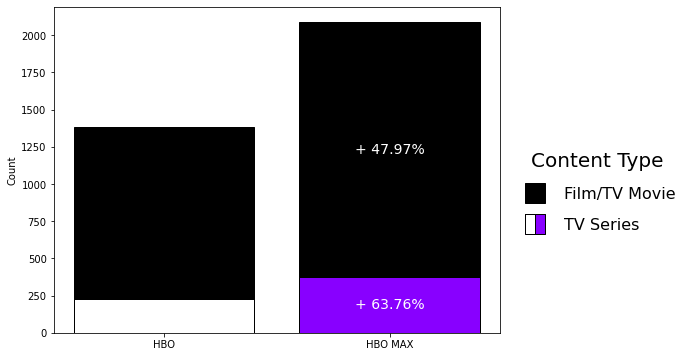

In [10]:
fig, ax = plt.subplots(figsize=(8,6))
## Plot Stacked Bar Charts
ax.bar(x, y1,color = ['white','#8800ff'],edgecolor = 'black')
ax.bar(x, y2 ,bottom=y1,color=["black"],edgecolor = 'black')

## Color Legend
m1, = ax.plot([], [], c='white' , marker='s', markersize=20,
              fillstyle='left', linestyle='none',markeredgecolor='black')
m2, = ax.plot([], [], c='#8800ff' , marker='s', markersize=20,
              fillstyle='right', linestyle='none')
m3, = ax.plot([], [], c='black' , marker='s', markersize=20,
              fillstyle='full', linestyle='none')
ax.text(x[1], y1[1]/2, "+ {change:.2f}%".format(change=TV_perc_change), 
        ha="center", va="center",color='white',fontsize=14)
ax.text(x[1], y1[1]+y2[1]/2, "+ {change:.2f}%".format(change=Film_perc_change), 
        ha="center", va="center",color='white',fontsize=14)

leg = ax.legend((m3,(m2, m1)),('Film/TV Movie','TV Series'), bbox_to_anchor=(1.01,.6), numpoints=1, 
                labelspacing=1,fontsize=16,edgecolor='none')
leg.set_title('Content Type',prop={'size':20})
ax.set_ylabel('Count')
plt.show()

## Rating Comparison

In [11]:
HBO_content_rating = HBO_df.rating.value_counts()
HBO_MAX_content_rating = HBO_MAX_df.rating.value_counts()
ratings = ['G/TV-G', 'PG/TV-PG','PG-13/TV-14','R/TV-MA']
HBO=[]
HBO_MAX=[]
perc_change=[]
for rating in ratings:
    HBO.append(HBO_content_rating[rating])
    HBO_MAX.append(HBO_MAX_content_rating[rating])
    perc_change.append(100*(HBO_MAX_content_rating[rating]-HBO_content_rating[rating])/HBO_content_rating[rating])


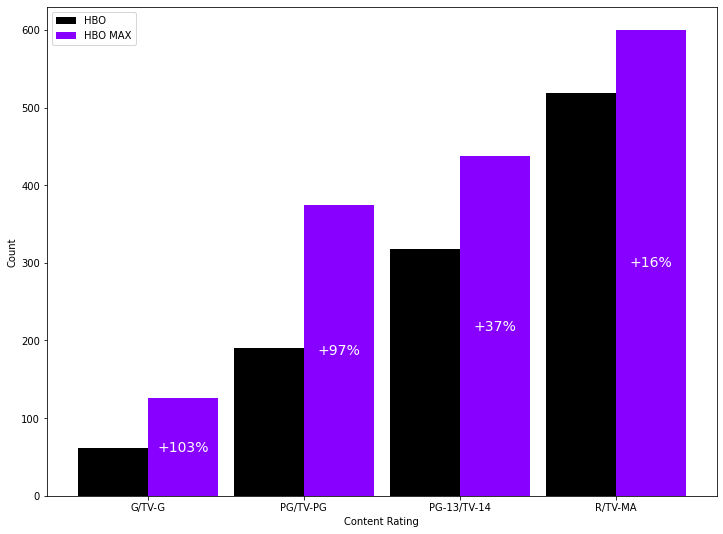

In [12]:
# Numbers of pairs of bars
N = 4
# Position of bars on x-axis
ind = np.arange(N)

# Initialize Figure
fig, ax = plt.subplots(figsize=(12,9))
ax.set_facecolor('white')

# Width of a bar 
width = 0.45       

# Plotting HBO and HBO MAX series
ax.bar(ind, HBO , width, label='HBO',color='black')
ax.bar(ind + width, HBO_MAX, width, label='HBO MAX',color='#8800ff')

ax.set_xlabel('Content Rating')
ax.set_ylabel('Count')

ax.set_xticks(ind + width / 2)
ax.set_xticklabels(ratings)

# Add Text 
ax.text(ind[0] + width, HBO_MAX[0]/2, "+{change:.0f}%".format(change=perc_change[0]), 
        ha="center", va="center",color='white',fontsize=14)
ax.text(ind[1] + width, HBO_MAX[1]/2, "+{change:.0f}%".format(change=perc_change[1]), 
        ha="center", va="center",color='white',fontsize=14)
ax.text(ind[2] + width, HBO_MAX[2]/2, "+{change:.0f}%".format(change=perc_change[2]), 
        ha="center", va="center",color='white',fontsize=14)
ax.text(ind[3] + width, HBO_MAX[3]/2, "+{change:.0f}%".format(change=perc_change[3]), 
        ha="center", va="center",color='white',fontsize=14)


# Finding the best position for legends and putting it
ax.legend(loc='best')
plt.show()

## Decade Made Comparison

In [13]:
HBO_content_decade = HBO_df.decade.value_counts()
HBO_MAX_content_decade = HBO_MAX_df.decade.value_counts()
decadeLabels = ['1910s','1920s','1930s','1940s','1950s','1960s',
                '1970s','1980s','1990s','2000s','2010s','2020s']
decades = range(len(decadeLabels))
HBO=[]
HBO_MAX=[]
perc_change=[]
for decade in decades:
    HBO.append(HBO_content_decade[decade])
    HBO_MAX.append(HBO_MAX_content_decade[decade])
    if HBO_content_decade[decade] != 0:
        perc_change.append(100*(HBO_MAX_content_decade[decade]-HBO_content_decade[decade])/HBO_content_decade[decade])
    else:
        perc_change.append(np.nan)

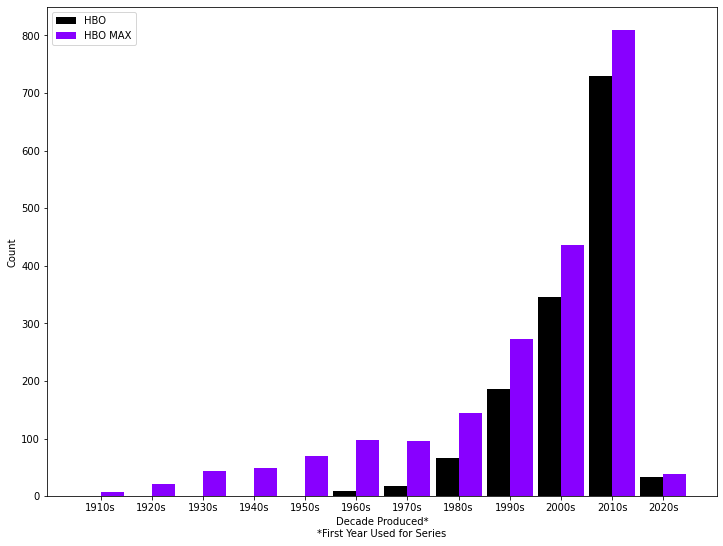

In [14]:
# Numbers of pairs of bars
N = 12
# Position of bars on x-axis
ind = np.arange(N)

# Initialize Figure
fig, ax = plt.subplots(figsize=(12,9))
ax.set_facecolor('white')

# Width of a bar 
width = 0.45       

# Plotting HBO and HBO MAX series
ax.bar(ind, HBO , width, label='HBO',color='black')
ax.bar(ind + width, HBO_MAX, width, label='HBO MAX',color='#8800ff')

ax.set_xlabel('Decade Produced*\n*First Year Used for Series')
ax.set_ylabel('Count')

ax.set_xticks(ind + width / 2)
ax.set_xticklabels(decadeLabels)

# Finding the best position for legends and putting it
ax.legend(loc='upper left')
plt.show()

## IMDB Score Analysis

In [15]:
print("Average IMDB Score of HBO Content: {0:.2f}".format(HBO_df.imdb_score.mean()))
print("Average IMDB Score of HBO MAX Content: {0:.2f}".format(HBO_MAX_df.imdb_score.mean()))

Average IMDB Score of HBO Content: 6.79
Average IMDB Score of HBO MAX Content: 6.94


In [16]:
HBO_imdb_bucket = HBO_df.imdb_bucket.value_counts()
HBO_MAX_imdb_bucket = HBO_MAX_df.imdb_bucket.value_counts()
scoreLabels = ['0-5.00','5.01-6.00','6.01-7.00','7.01-7.50','7.51-8.00','8.01-8.50',
                '8.51-9.00','9.01-9.50','9.51-10']
buckets = range(len(scoreLabels))
HBO=[]
HBO_MAX=[]
perc_change=[]
for bucket in buckets:
    HBO.append(HBO_imdb_bucket[bucket])
    HBO_MAX.append(HBO_MAX_imdb_bucket[bucket])
    if HBO_imdb_bucket[bucket] != 0:
        perc_change.append(100*(HBO_MAX_imdb_bucket[bucket]-HBO_imdb_bucket[bucket])/HBO_imdb_bucket[bucket])
    else:
        perc_change.append(np.nan)

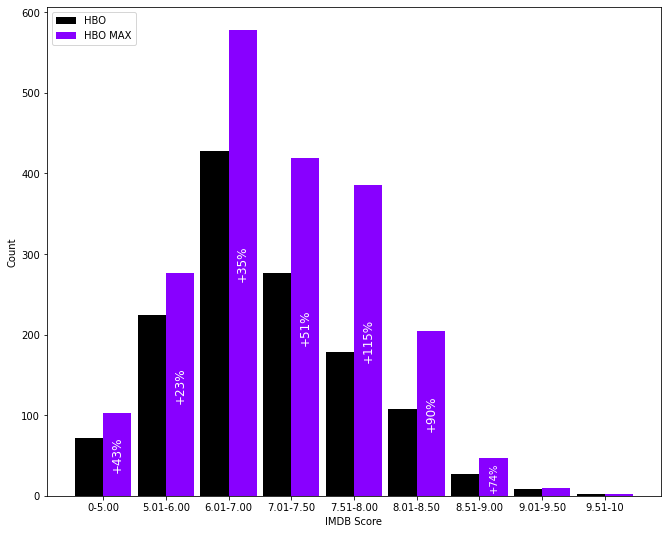

In [17]:
# Numbers of pairs of bars
N = len(scoreLabels)
# Position of bars on x-axis
ind = np.arange(N)

# Initialize Figure
fig, ax = plt.subplots(figsize=(11,9))
ax.set_facecolor('white')

# Width of a bar 
width = 0.45       

# Plotting HBO and HBO MAX series
ax.bar(ind, HBO , width, label='HBO',color='black')
ax.bar(ind + width, HBO_MAX, width, label='HBO MAX',color='#8800ff')

ax.set_xlabel('IMDB Score')
ax.set_ylabel('Count')

ax.set_xticks(ind + width / 2)
ax.set_xticklabels(scoreLabels)

# Add Text 
ax.text(ind[0] + width, HBO_MAX[0]/2, "+{change:.0f}%".format(change=perc_change[0]), 
        ha="center", va="center",color='white',fontsize=12,rotation='vertical')
ax.text(ind[1] + width, HBO_MAX[1]/2, "+{change:.0f}%".format(change=perc_change[1]), 
        ha="center", va="center",color='white',fontsize=12,rotation='vertical')
ax.text(ind[2] + width, HBO_MAX[2]/2, "+{change:.0f}%".format(change=perc_change[2]), 
        ha="center", va="center",color='white',fontsize=12,rotation='vertical')
ax.text(ind[3] + width, HBO_MAX[3]/2, "+{change:.0f}%".format(change=perc_change[3]), 
        ha="center", va="center",color='white',fontsize=12,rotation='vertical')
ax.text(ind[4] + width, HBO_MAX[4]/2, "+{change:.0f}%".format(change=perc_change[4]), 
        ha="center", va="center",color='white',fontsize=12,rotation='vertical')
ax.text(ind[5] + width, HBO_MAX[5]/2, "+{change:.0f}%".format(change=perc_change[5]), 
        ha="center", va="center",color='white',fontsize=12,rotation='vertical')
ax.text(ind[6] + width, HBO_MAX[6]/2, "+{change:.0f}%".format(change=perc_change[6]), 
        ha="center", va="center",color='white',fontsize=10,rotation='vertical')

# Finding the best position for legends and putting it
ax.legend(loc='upper left')
plt.show()

## Rotten Tomatoes Score Analysis

In [18]:
HBO_scores = HBO_df['rotten_score'].dropna()
HBO_scores = HBO_scores.astype(float)/100
HBO_MAX_scores = HBO_MAX_df['rotten_score'].dropna()
HBO_MAX_scores = HBO_MAX_scores.astype(float)/100
scoreLabels = ['0-10%','11-20%','21-30%','31-40%','41-50%','51-60%','61-70%','71-75%','76-80%','81-85%',
                '86-90%','91-95%','96-100%']
buckets = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.75,0.8,0.85,0.9,0.95,1]
HBO_buckets = pd.cut(HBO_scores, bins=buckets,labels=scoreLabels)
HBO_MAX_buckets = pd.cut(HBO_MAX_scores, bins=buckets,labels=scoreLabels)

In [19]:
print("Average RT Score of HBO Content: {0:.2f}".format(HBO_scores.mean()))
print("Average RT Score of HBO MAX Content: {0:.2f}".format(HBO_MAX_scores.mean()))

Average RT Score of HBO Content: 0.68
Average RT Score of HBO MAX Content: 0.73


In [20]:
HBO_imdb_bucket = HBO_buckets.value_counts()
HBO_MAX_imdb_bucket = HBO_MAX_buckets.value_counts()

buckets = range(len(scoreLabels))
HBO=[]
HBO_MAX=[]
perc_change=[]
for bucket in buckets:
    HBO.append(HBO_imdb_bucket[bucket])
    HBO_MAX.append(HBO_MAX_imdb_bucket[bucket])
    if HBO_imdb_bucket[bucket] != 0:
        perc_change.append(100*(HBO_MAX_imdb_bucket[bucket]-HBO_imdb_bucket[bucket])/HBO_imdb_bucket[bucket])
    else:
        perc_change.append(np.nan)

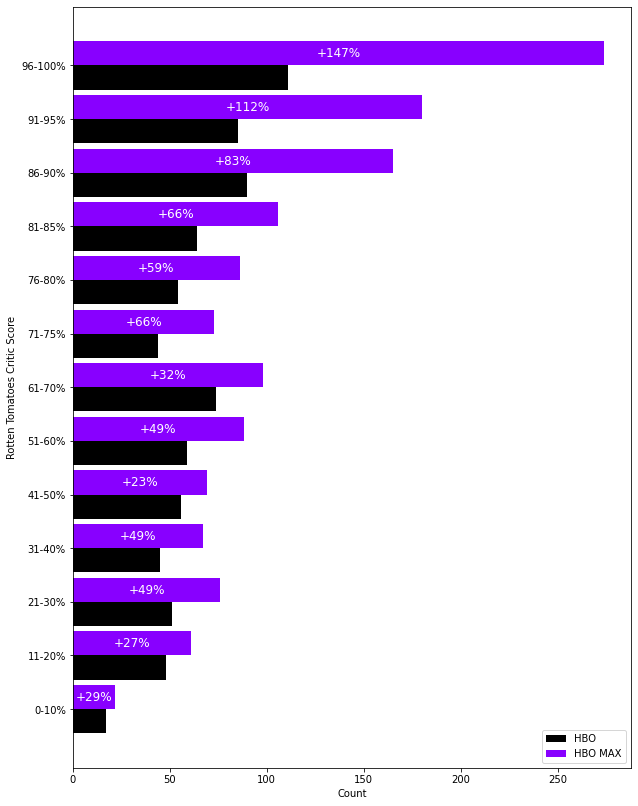

In [21]:
# Numbers of pairs of bars
N = len(scoreLabels)
# Position of bars on x-axis
ind = np.arange(N)

# Initialize Figure
fig, ax = plt.subplots(figsize=(10,14))
ax.set_facecolor('white')

# Width of a bar 
width = 0.45       

# Plotting HBO and HBO MAX series
ax.barh(ind, HBO , width, label='HBO',color='black')
ax.barh(ind + width, HBO_MAX, width, label='HBO MAX',color='#8800ff')

ax.set_ylabel('Rotten Tomatoes Critic Score')
ax.set_xlabel('Count')

ax.set_yticks(ind + width / 2)
ax.set_yticklabels(scoreLabels)

# Add % increase Text 
for i in range(N):
    ax.text(HBO_MAX[i]/2, ind[i] + width, "+{change:.0f}%".format(change=perc_change[i]), 
        ha="center", va="center",color='white',fontsize=12)

# Finding the best position for legends and putting it
ax.legend(loc='best')
plt.show()

## Genre Analysis
The data we have is in the form of a list inside of a string. We want these to become binary features.

In [22]:
# Select Genre Columns
genre_cols = [col for col in HBO_df.columns if 'genre' in col]
# Create a pandas.DataFrame from our output
HBO_expandedGenres = HBO_df[genre_cols]
HBO_Genre_Counts = HBO_expandedGenres.sum()

In [23]:
# Select Genre Columns
genre_cols = [col for col in HBO_MAX_df.columns if 'genre' in col]
# Create a pandas.DataFrame from our output
HBO_MAX_expandedGenres = HBO_MAX_df[genre_cols]
HBO_MAX_Genre_Counts = HBO_MAX_expandedGenres.sum()

In [24]:
genre_list = list(set(HBO_Genre_Counts.index.tolist()).union(set(HBO_MAX_Genre_Counts.index.tolist())))
HBO = []
for genre in genre_list:
    try:
        HBO.append(HBO_Genre_Counts[genre])
    except:
        HBO.append(0)
# I want an ordered list so I am going to redo the ordering with the HBO Content values
genre_list_ordered = pd.Series(HBO,index=genre_list).sort_values().index.tolist()
HBO = []
HBO_MAX = []
for genre in genre_list_ordered:
    try:
        HBO.append(HBO_Genre_Counts[genre])
    except:
        HBO.append(0)
    try:
        HBO_MAX.append(HBO_MAX_Genre_Counts[genre])
    except:
        HBO_MAX.append(0)
## Strip out the ugly genres_ from the list
genre_list_ordered = [genre[7:] for genre in genre_list_ordered]

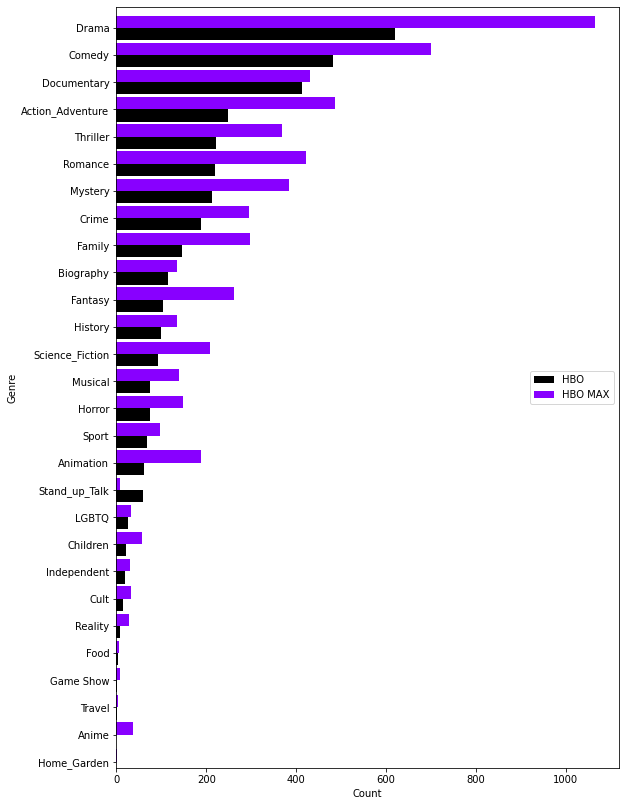

In [25]:
# Numbers of pairs of bars
N = len(genre_list_ordered)
# Position of bars on y-axis
ind = np.arange(N)

# Initialize Figure
fig, ax = plt.subplots(figsize=(9,14))
ax.set_facecolor('white')

# Width of a bar 
width = 0.45       

# Plotting HBO and HBO MAX series
ax.barh(ind, HBO, width, label='HBO',color='black')
ax.barh(ind + width, HBO_MAX, width, label='HBO MAX',color='#8800ff')

# Set Axis labels, ticks and limits
ax.set_xlabel('Count')
ax.set_ylabel('Genre')
ax.set_yticks(ind + width / 2)
ax.set_yticklabels(genre_list_ordered)
ax.set_ylim(0,N)

# Finding the best position for legends and putting it
ax.legend(loc='right')
plt.show()